In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
inv_raw = pd.read_excel("./decrypted_raw.xlsx", sheet_name='Invoice_Raw_Hashed')

In [67]:
group_raw = inv_raw.groupby('item_category', dropna=False)['customer_id'].count().reset_index(name='原始分類筆數').rename(columns={'item_category': 'Item_category'})
group_raw.drop(index=0, inplace=True)
group_raw.loc[58, '原始分類筆數'] = 153732
group_raw.reset_index(drop=True, inplace=True)

In [17]:
inv_1113 = pd.read_excel("./invoice_20241113.xlsx")

In [42]:
group_1113 = inv_1113.groupby('Item_category', dropna=False)['customer_id'].count().reset_index(name='重分類前筆數')

In [4]:
inv_1201 = pd.read_excel("./invoice_20241201.xlsx")

In [43]:
group_1201 = inv_1201.groupby('Item_category_new', dropna=False)['customer_id'].count().reset_index(name='重分類後筆數').rename(columns={'Item_category_new': 'Item_category'})

In [85]:
final = group_raw.merge(group_1113, on='Item_category', how='left')
final = final.merge(group_1201, on='Item_category', how='left')

In [88]:
plt.rcParams['font.sans-serif'] = ['Arial Unicode Ms']
plt.rcParams['figure.figsize'] = (15, 6)

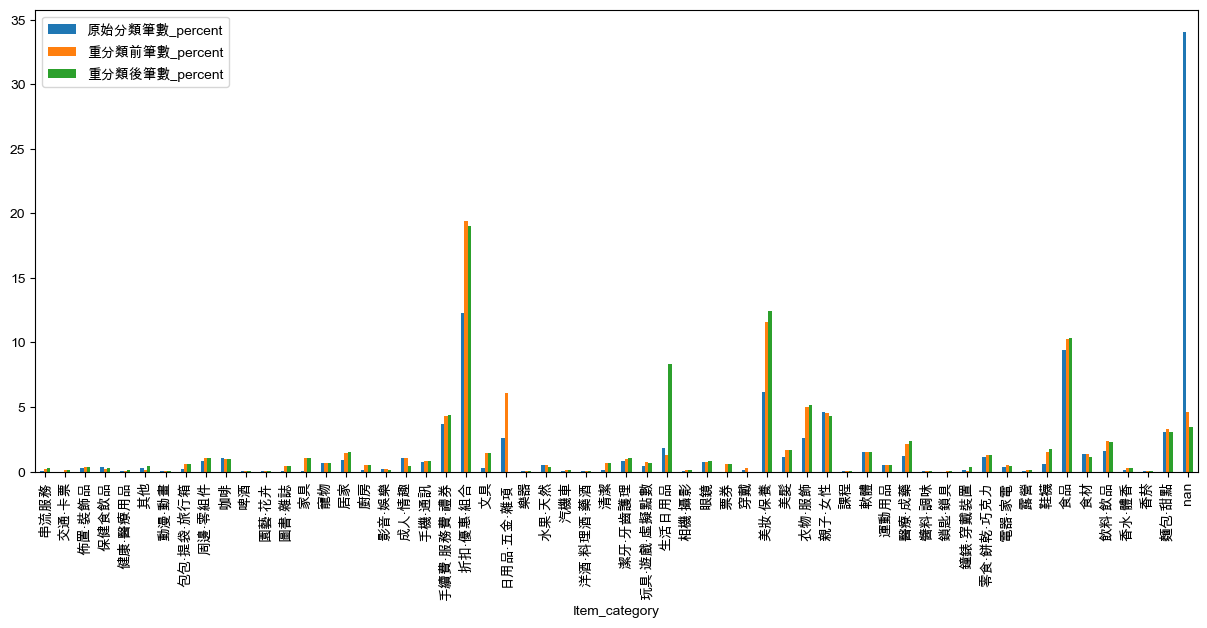

In [91]:
final[['Item_category', '原始分類筆數_percent', '重分類前筆數_percent', '重分類後筆數_percent']].plot(kind='bar', x='Item_category')
plt.show()

In [86]:
for col in final.columns:
    if col != 'Item_category':
        final[f'{col}_percent'] = final[col].apply(lambda x: round((x/final[col].sum()) * 100, 2))

In [92]:
final.to_excel('count.xlsx', index=False)